Programa para el análisis de datos y representaciones de la práctica de propiedades térmicas del máster de materiales de la us del curo 23/24

In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import re

$\Huge{Práctica\ 1:\ -\ Ciclos\ con\ T}$

In [78]:
#   Credit to chatgpt for this function to find files

def load_files_with_pattern(directory, T_file):
    # Compile the regex pattern to match files starting with 'C' followed by a number
    pattern = re.compile(r'^C\d+')
    T_table = pd.read_csv(T_file, header = None)
    T_dict = dict(zip(T_table[1], T_table[0]))
    # Initialize an empty dictionary to store the dataframes
    dataframes = {}
    # Iterate over all files in the specified directory
    for filename in os.listdir(directory):
        # Check if the filename matches the pattern
        if pattern.match(filename):
            # Construct the full file path
            filepath = os.path.join(directory, filename)
            try:
                # Attempt to read the file into a pandas dataframe
                df = pd.read_csv(filepath, header = None)
                temp = T_dict.get(filename, None)
                # Store the dataframe in the dictionary
                dataframes[filename] = (temp, df)
            except Exception as e:
                print(f"Error reading {filename}: {e}")

    return dataframes, T_table[1]

In [79]:
#   Find and load all related files: file_name structure: C#.DAT
direc = 'datos_practicas_23_24'
dtfs, file_names = load_files_with_pattern(direc, 'temps_ej1.csv')

Tarea 1: Para el ciclo C1.dat, C6.dat y C12.dat, analizad la señal del campo eléctrico frente al tiempo y de la polarización frente al tiempo, discutiendo cómo se relaciona con el carácter ferroeléctrico o paraeléctrico de la muestra.

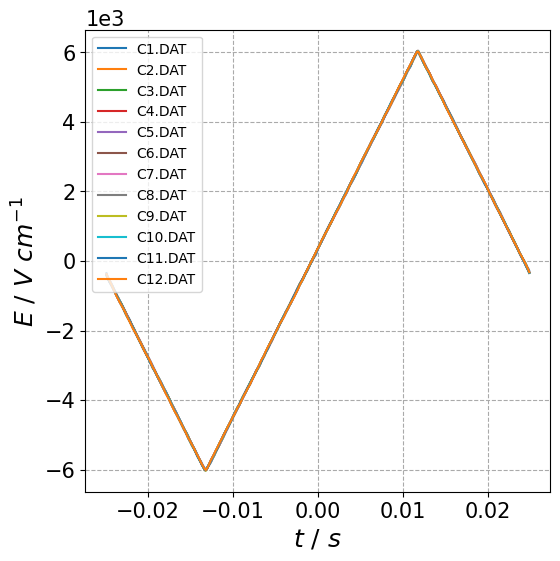

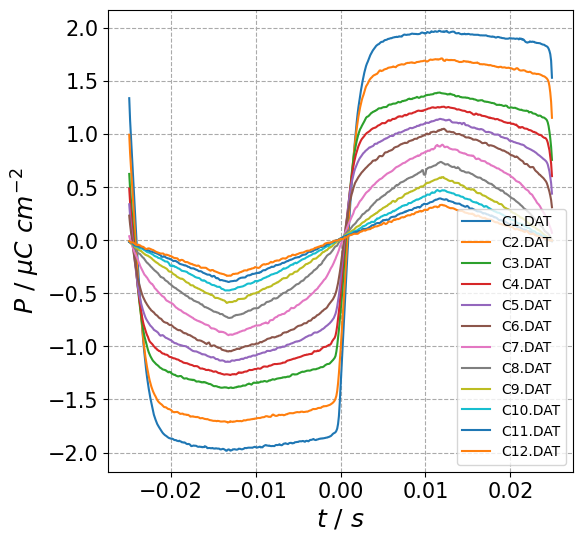

In [80]:
list_of_cicles = file_names#['C1.DAT', 'C6.DAT', 'C12.DAT']
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
fig2 = plt.figure()
ax2 = fig2.add_subplot(1,1,1)
#fig3 = plt.figure()
#ax3 = fig3.add_subplot(1,1,1)
for i in list_of_cicles:
    dtfs[i][1].plot(x = 0, y = 1, ax=ax, figsize = (6, 6))
    dtfs[i][1].plot(x = 0, y = 2, ax=ax2, figsize = (6, 6))
#    if dtfs[i][0] == 323.6:
#      dtfs[i][1].plot(x = 1, y = 2, ax=ax3)
#plt.grid()
ax.legend (list_of_cicles)
ax2.legend (list_of_cicles)
ax.set_ylabel('$E\ /\ V\ cm^{-1}$', fontsize = 18)
ax.set_xlabel('$t\ /\ s $', fontsize = 18)
ax.tick_params(labelsize=15)
ax.grid(linestyle = '--', color = '#aaaaaa')
ax2.grid(linestyle = '--', color = '#aaaaaa')

ax.ticklabel_format(axis= 'y', style = 'sci', scilimits = (3, 3))

ax2.set_ylabel('$P\ /\ \mu C\ cm^{-2}$', fontsize = 18)
ax2.set_xlabel('$t\ /\ s $', fontsize = 18)

fig.savefig('E-t.pdf')
fig2.savefig('P-t.pdf')

In [81]:
def r(x, a, b):
    return a * x + b

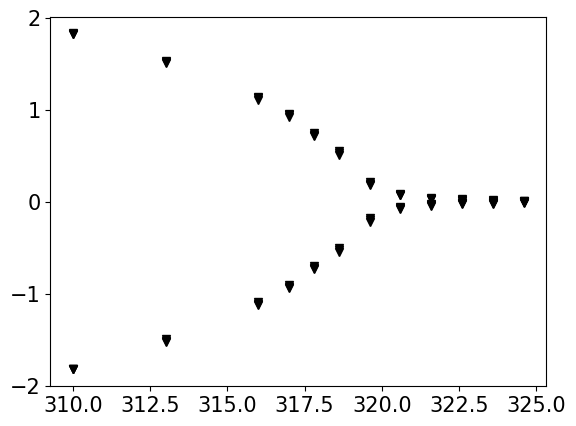

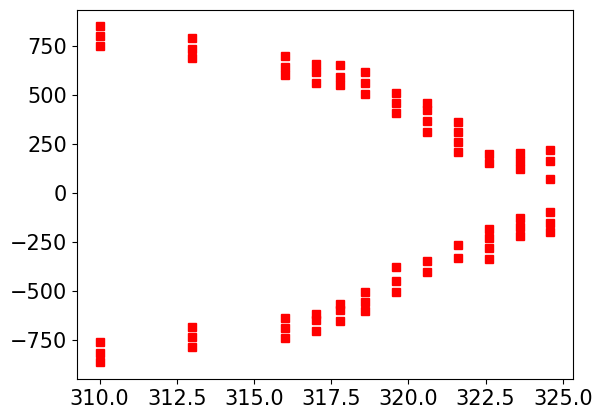

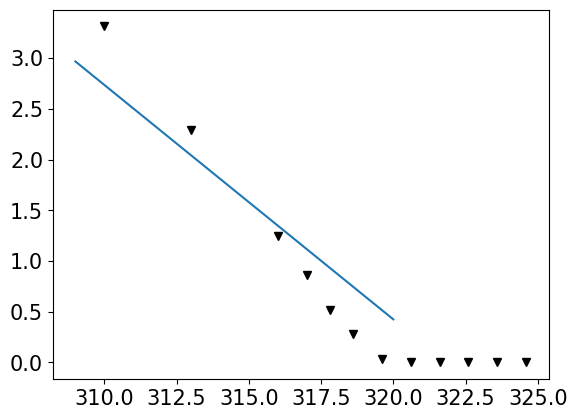

In [82]:
#   Cálculo de Pr y Ec
from scipy.optimize import curve_fit
Pr = []
Ec = []
fig = plt.figure()
ax = fig.subplots()
fig2 = plt.figure()
ax2 = fig2.subplots()
fig3 = plt.figure()
ax3 = fig3.subplots()
for i in list_of_cicles:
    t_Ec = dtfs[i][1][1].iloc[(dtfs[i][1][2]).abs().argsort()[:6]].to_list()
    t_Pr = dtfs[i][1][2].iloc[(dtfs[i][1][1]).abs().argsort()[:6]].to_list()
    Pr.append(t_Pr)
    Ec.append(t_Ec)
    for j in range(len(t_Pr)):
        ax.plot(dtfs[i][0], t_Pr[j], 'kv')
        ax2.plot(dtfs[i][0], t_Ec[j], 'rs')
#ax.set_yscale('log')
#ax2.set_yscale('log')
#ax3.set_yscale('log')
av_Pr2 = []
T = []
for i in range (len (Pr)):
    av_Pr2.append(np.mean([j**2 for j in Pr[i]]))
for i in list_of_cicles:
    T.append (dtfs[i][0])
#print (av_Pr2)
ax3.plot(T, av_Pr2, 'kv')
par, cov = curve_fit(r, T[:], av_Pr2[:])
x = np.linspace(309, 320, 100)
y = r(x, par[0], par[1])
ax3.plot(x, y)

$\Large{LATGS}$

Polarización remanente:  0.17429683333333326 0.00620266666666669


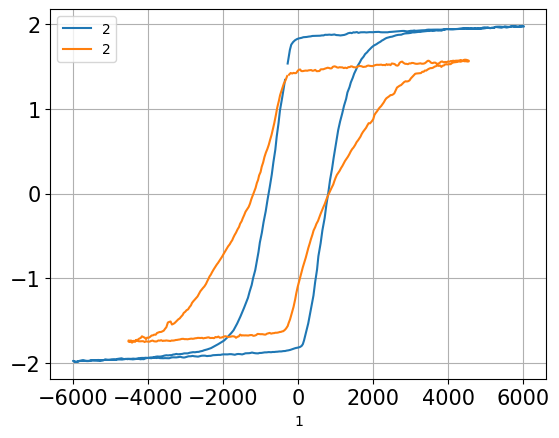

In [83]:
df_LATGS = pd.read_csv('datos_practicas_23_24/CLATGS.DAT', header=None)

fig = plt.figure()
ax = fig.subplots()

dtfs['C1.DAT'][1].plot(x = 1, y = 2, ax = ax)
df_LATGS.plot(x = 1, y =2, ax = ax)
ax.grid()

Ec_LATGS = df_LATGS[1].iloc[df_LATGS[2].abs().argsort()[:6]].to_list()
Pr_LATGS = df_LATGS[2].iloc[df_LATGS[1].abs().argsort()[:6]].to_list()

print('Polarización remanente: ', np.mean(Pr_LATGS), np.mean(Pr[0])) #Im leaving this as is because even though it doesnt make much sense to average out both + and - it shows LATGS is shifted beacuse mean is not 0


In [84]:
#Fit and find spontaneous polarization

def Ps (df, th):
    p_vals = [[],[]]
    n_vals = [[],[]]
    direction = 0
    prev = df[1].loc[0]
    for i in df[1]:
        if i > prev:
            direction = 1
        elif i <= prev:
            direction = 0
        prev = i
        if i > th and direction == 0:
            p_vals[0].append(i)
            p_vals[1].append(df[2].loc[df[1]==i].to_list()[0])
        elif i < -th and direction ==1:
            n_vals[0].append(i)
            n_vals[1].append(df[2].loc[df[1]==i].to_list()[0])
    p_par, p_cov = curve_fit(r, p_vals[0], p_vals[1])
    n_par, n_cov = curve_fit(r, n_vals[0], n_vals[1])
    return p_par, n_par

P_s TGS=  1.8676170101938723 -1.8734151098456886 
 P_r TGS =  [-1.814062, 1.826842, 1.819802, -1.807921, 1.830661, -1.818106]
P_s LATGS=  1.4588374698473785 -1.6866759794109354 
 P_r LATGS=  [1.458345, -1.102462, -1.04146, 1.441944, 1.461745, -1.172331]


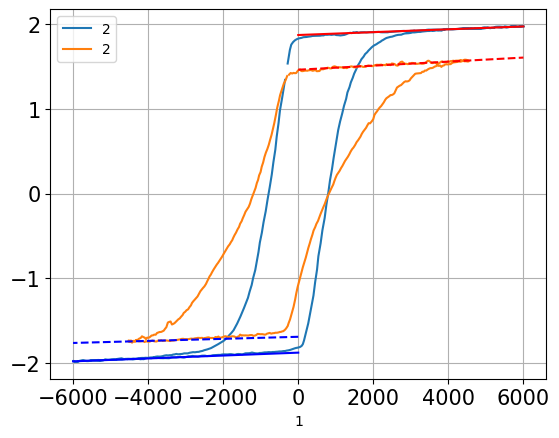

In [85]:
p_TGS, n_TGS = Ps (dtfs['C1.DAT'][1], 3000)
p_LATGS, n_LATGS = Ps (df_LATGS, 3000)


#   Plot cicles

fig = plt.figure()
ax = fig.subplots()

dtfs['C1.DAT'][1].plot(x = 1, y = 2, ax = ax)
df_LATGS.plot(x = 1, y =2, ax = ax)


#   Plot fitted curves

p_x = np.linspace(0, 6000, 1000)
n_x = np.linspace(0, -6000, 1000)

p_y_TGS = r(p_x, p_TGS[0], p_TGS[1])
n_y_TGS = r(n_x, n_TGS[0], n_TGS[1])
p_y_LATGS = r(p_x, p_LATGS[0], p_LATGS[1])
n_y_LATGS = r(n_x, n_LATGS[0], n_LATGS[1])

ax.plot(p_x, p_y_TGS, 'r-')
ax.plot(n_x, n_y_TGS, 'b-')
ax.plot(p_x, p_y_LATGS, 'r--')
ax.plot(n_x, n_y_LATGS, 'b--')

#Print spontaneous pol
print ('P_s TGS= ', p_TGS[1], n_TGS[1], '\n', 'P_r TGS = ', Pr[0])
print ('P_s LATGS= ', p_LATGS[1], n_LATGS[1], '\n', 'P_r LATGS= ', Pr_LATGS)

ax.grid()

$\Huge{Practica\ 2:\ Constante\ Dielectrica}$

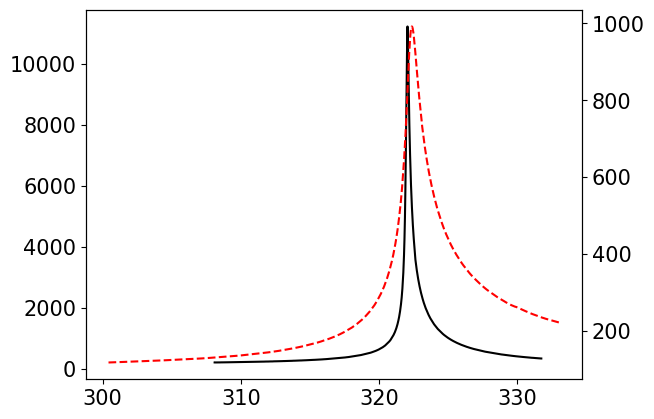

In [86]:
e0 = 8.85e-12
S_TGS = 64e-6
d_TGS = 2.1e-3
S_LATGS = 86e-6
d_LATGS = 2.2e-3

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax1 = ax.twinx()
C_TGS = pd.read_csv('datos_practicas_23_24/cd_tgs.dat', header=None)
C_LATGS = pd.read_csv('datos_practicas_23_24/cd_latgs.dat', header=None)

e_TGS = C_TGS [1] * d_TGS / e0 / S_TGS
e_LATGS = C_LATGS [1] * d_LATGS / e0 / S_LATGS

ax.plot(C_TGS[0].loc[:], e_TGS.loc[:], 'k-')
ax1.plot(C_LATGS[0].loc[:], e_LATGS.loc[:], 'r--')

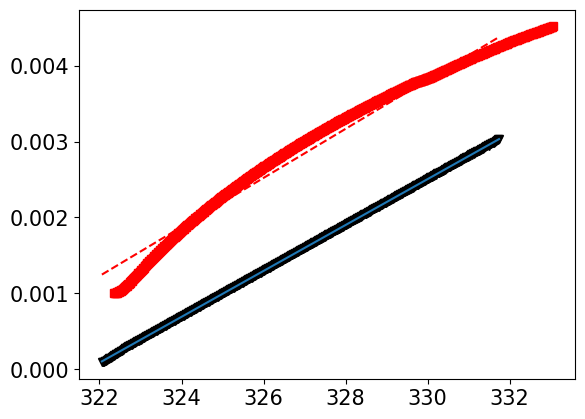

In [102]:
#   Ley Curie-Weiss

par_cw, cov_cw = curve_fit(r, C_TGS[0].iloc[e_TGS.idxmax():], 1. / e_TGS.iloc[e_TGS.idxmax():])
LApar_cw, LAcov_cw = curve_fit(r, C_LATGS[0].iloc[e_LATGS.idxmax():], 1. / e_LATGS.iloc[e_LATGS.idxmax():])

x = np.linspace(C_TGS[0].iloc[e_TGS.idxmax()], C_TGS[0].max(), 200)
y = r(x, par_cw[0], par_cw[1])
LAy = r(x, LApar_cw[0], LApar_cw[1])

fig = plt.figure()
ax = fig.subplots()

ax.plot(C_TGS[0].iloc[e_TGS.idxmax():], 1. / e_TGS.iloc[e_TGS.idxmax():], 'kv')
ax.plot(x, y)
ax.plot(C_LATGS[0].iloc[e_LATGS.idxmax():], 1. / e_LATGS.iloc[e_LATGS.idxmax():], 'rs')
ax.plot(x, LAy, 'r--')


[ 0.00030251 -0.09732425] [-0.00073822  0.23786996]


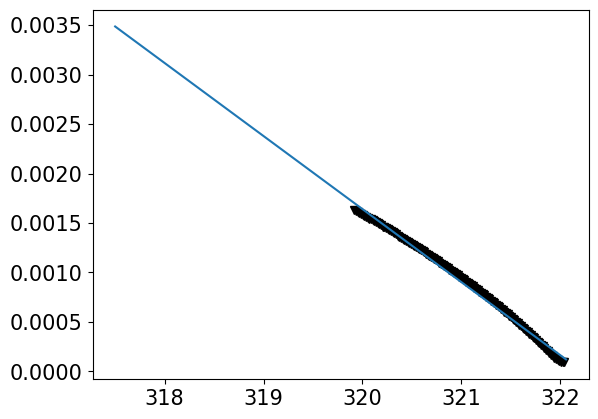

In [101]:
par_l, cov_l = curve_fit(r, C_TGS[0].iloc[900:e_TGS.idxmax()], 1. / e_TGS.iloc[900:e_TGS.idxmax()])
print(par_cw, par_l)
x = np.linspace(C_TGS[0].iloc[e_TGS.idxmax()], 317.5, 200)
y = r(x, par_l[0], par_l[1])

fig = plt.figure()
ax = fig.subplots()

ax.plot(C_TGS[0].iloc[900:e_TGS.idxmax()], 1. / e_TGS.iloc[900:e_TGS.idxmax()], 'kv')
ax.plot(x, y)

$\Huge{Practica\ 3:\ Coeficiente\ piro}$

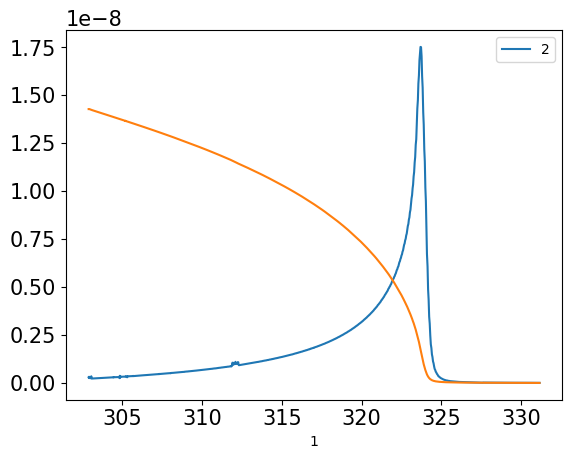

In [87]:
#   Load Data

from scipy.integrate import cumtrapz

S = 64
data = pd.read_csv('datos_practicas_23_24/piro_tgs.dat', header=None)
pi = data[2] / (data[3] * S)
data.plot(x = 1, y = 2)
P = cumtrapz(pi, data[1])
plt.plot(data[1].loc[:len(P)-1], P)
#pd.set_option('display.max_rows', 1500)
#print (data[1])


Figura de mérito

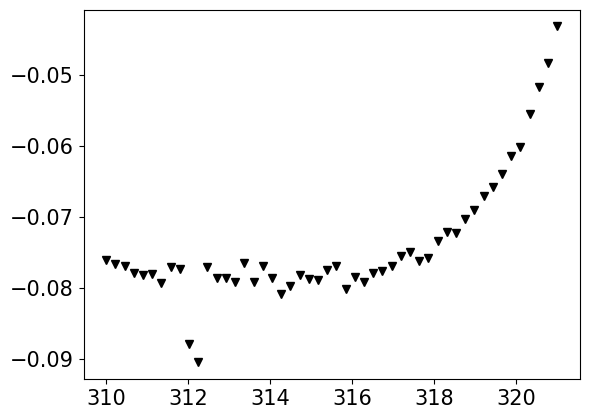

In [88]:
#    Load c data
rho = 1.69
c = pd.read_csv('datos_practicas_23_24/calorespecifico.dat', header=None)
cSv = c[1] * rho
T = np.linspace(310, 321, 50)
Fv = []
for i in T:
    df_closest_e = e_TGS.iloc[(C_TGS[0]-i).abs().argsort()[:1]]
    df_closest_cSv = cSv.iloc[(c[0]-i).abs().argsort()[:1]]
    df_closest_pi = pi.iloc[(data[1]-i).abs().argsort()[:1]]
    Fv.append(df_closest_pi.to_list()[0] / (e0 * df_closest_e.to_list()[0] * df_closest_cSv.to_list()[0]))
plt.plot(T, Fv, 'kv')